<a href="https://colab.research.google.com/github/varuchi09/Music-popularity-prediction/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING MODULES**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# **LOADING DATASET**

In [5]:
df = pd.read_csv('SpotifyFeatures.csv')
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


# **SHIFTING COLUMN**

In [ ]:
cols = (list(df.columns))
cols

['genre',
 'artist_name',
 'track_name',
 'track_id',
 'popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence']

In [ ]:
col_to_move = cols.pop(4)
cols.insert(17, col_to_move)
df = df[cols]
df.head()

,genre,artist_name,track_name,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,0
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,1
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,3
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,0
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,4


# **GETTING INSIGHTS FROM THE DATASET**

In [12]:
df.shape  # ROWS AND COLUMNS

(36811, 18)

In [13]:
df.size   # NUMBER OF ELEMENTS

662598

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   acousticness      232725 non-null  float64
 5   danceability      232725 non-null  float64
 6   duration_ms       232725 non-null  int64  
 7   energy            232725 non-null  float64
 8   instrumentalness  232725 non-null  float64
 9   key               232725 non-null  object 
 10  liveness          232725 non-null  float64
 11  loudness          232725 non-null  float64
 12  mode              232725 non-null  object 
 13  speechiness       232725 non-null  float64
 14  tempo             232725 non-null  float64
 15  time_signature    232725 non-null  object 
 16  valence           23

In [ ]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
count,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917,41.127502
std,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065,18.189948
min,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000,0.000000
25%,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000,29.000000
50%,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000,43.000000
75%,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000,55.000000
max,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000,100.000000


In [ ]:
df.isnull()

,genre,artist_name,track_name,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
232721,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
232722,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
232723,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

genre               0
artist_name         0
track_name          1
track_id            0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64

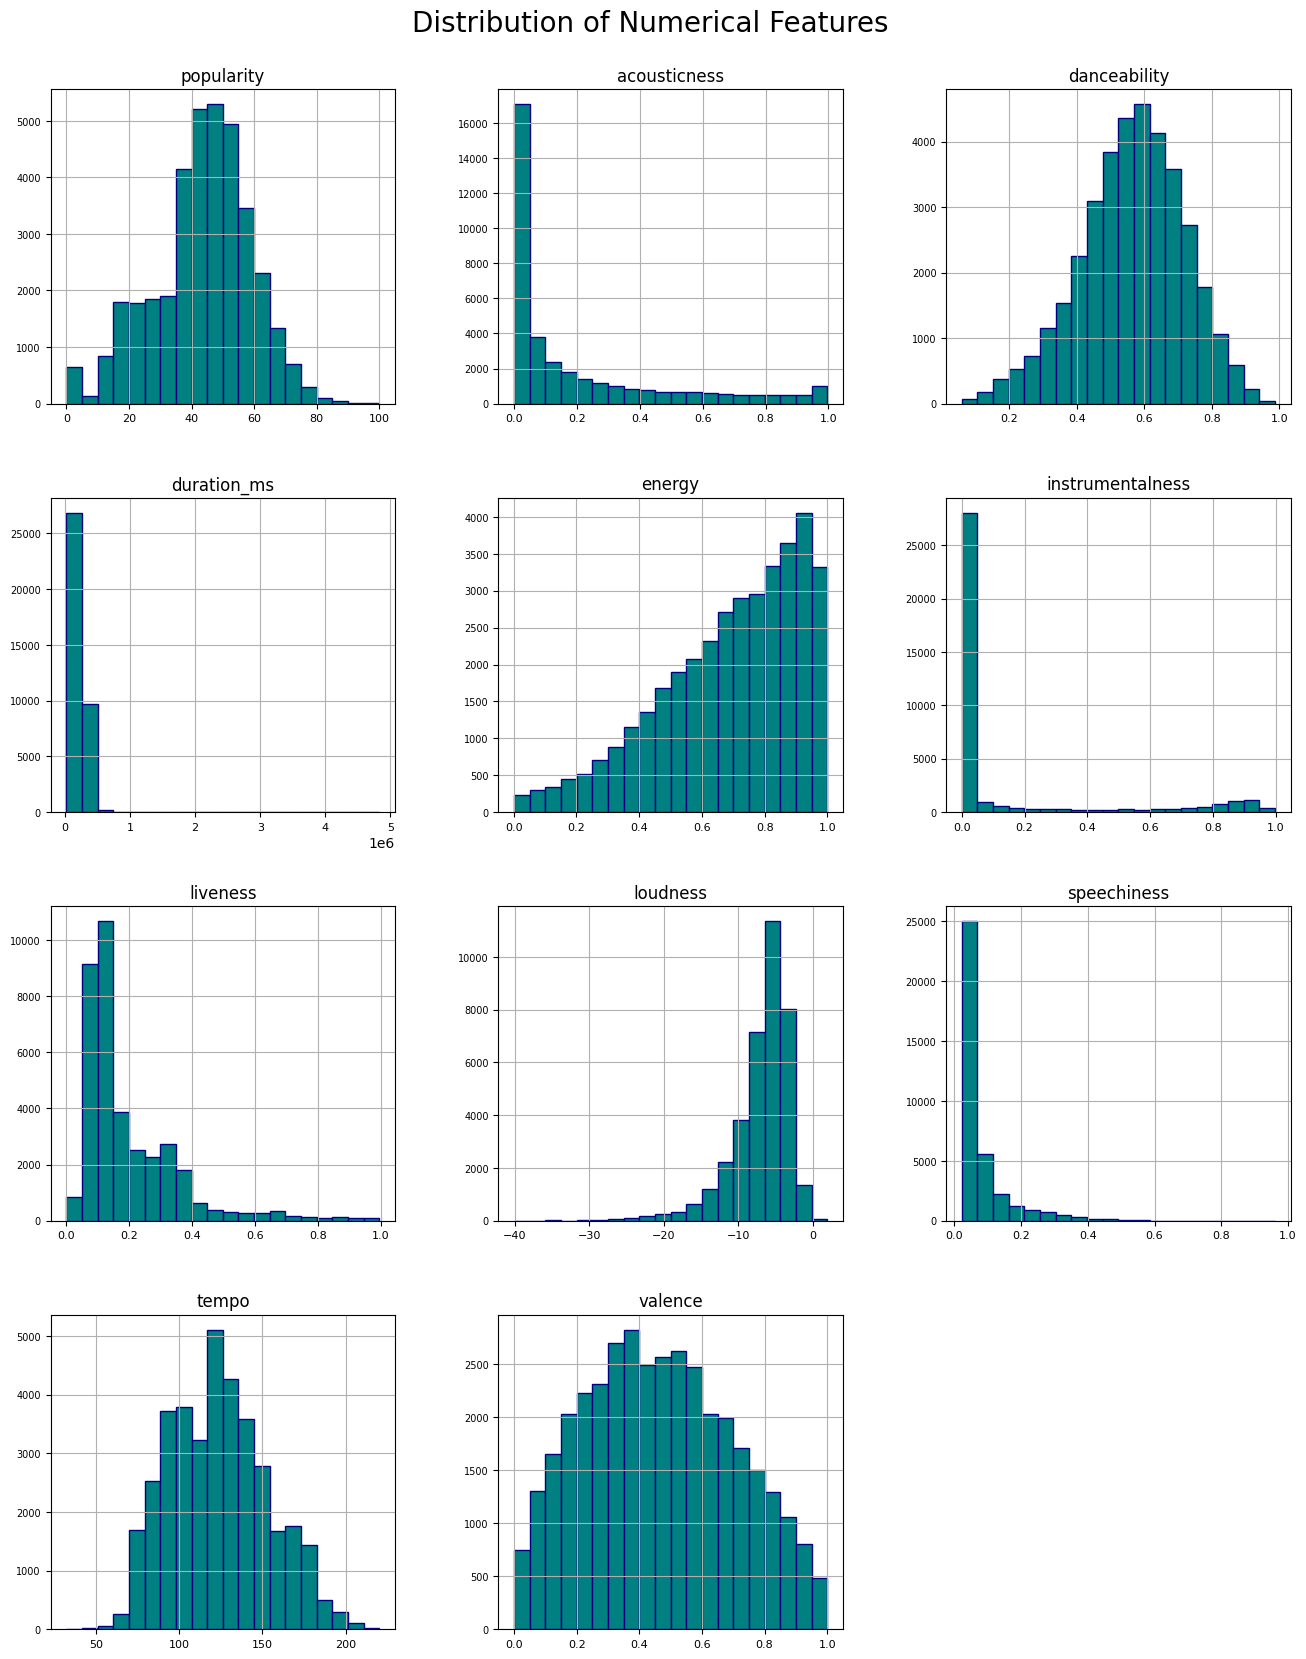

In [48]:
df.hist(figsize = (16, 20), bins = 20, xlabelsize = 8, ylabelsize = 7, color = 'teal', edgecolor = 'navy')
plt.suptitle("Distribution of Numerical Features",fontsize = 20, y = 0.92)
plt.show()

# **HANDLING MISSING VALUES**

In [6]:
df = df.fillna(method = "ffill")
df.isnull().sum()

/tmp/ipython-input-6-3851398128.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method = "ffill")


,0
genre,0
artist_name,0
track_name,0
track_id,0
popularity,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0


# **INDEPENDENT (x) and DEPENDENT VARIABLE (y)**

In [16]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(x)
print(y)

            genre        artist_name                        track_name  \
0           Movie     Henri Salvador       C'est beau de faire un Show   
1           Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2           Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3           Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4           Movie       Fabien Nataf                         Ouverture   
...           ...                ...                               ...   
36806  Electronic           Doctor P                 The Champagne Bop   
36807  Electronic  Jean-Michel Jarre        FLYING TOTEMS - movement 2   
36808  Electronic     The Avalanches                      Summer Crane   
36809  Electronic        The Prodigy                     Wall Of Death   
36810  Electronic           Pendulum                          Out Here   

                     track_id  popularity  acousticness  danceability  \
0      0BRjO6ga9RKCKjfDqeFgWV         

# EDA

In [50]:
encoder = OneHotEncoder()
x[['genre','artist_name']] = encoder.fit_transform(x[['genre','artist_name']])
print(x)

UFuncTypeError: ufunc 'maximum' did not contain a loop with signature matching types (dtype('<U11'), dtype('<U11')) -> None

# **SPLITTING THE DATASET INTO TRAINING AND TESTING SETS**

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 500616 stored elements and shape (29448, 144352)>
  Coords	Values
  (0, 2)	1.0
  (0, 2628)	1.0
  (0, 25422)	1.0
  (0, 45459)	1.0
  (0, 71589)	1.0
  (0, 74527)	1.0
  (0, 76532)	1.0
  (0, 92263)	1.0
  (0, 100263)	1.0
  (0, 100307)	1.0
  (0, 105296)	1.0
  (0, 106286)	1.0
  (0, 116702)	1.0
  (0, 119447)	1.0
  (0, 120104)	1.0
  (0, 131779)	1.0
  (0, 144350)	1.0
  (1, 3)	1.0
  (1, 2146)	1.0
  (1, 16534)	1.0
  (1, 46306)	1.0
  (1, 71601)	1.0
  (1, 75921)	1.0
  (1, 76579)	1.0
  (1, 77824)	1.0
  :	:
  (29446, 100307)	1.0
  (29446, 105293)	1.0
  (29446, 106323)	1.0
  (29446, 114662)	1.0
  (29446, 119446)	1.0
  (29446, 119668)	1.0
  (29446, 138634)	1.0
  (29446, 144350)	1.0
  (29447, 5)	1.0
  (29447, 3569)	1.0
  (29447, 10514)	1.0
  (29447, 65494)	1.0
  (29447, 71602)	1.0
  (29447, 75647)	1.0
  (29447, 76493)	1.0
  (29447, 88535)	1.0
  (29447, 99721)	1.0
  (29447, 102051)	1.0
  (29447, 105299)	1.0
  (29447, 106027)	1.0
  (29447, 112903

# **TRAINING THE MODEL**

In [19]:
model = Ridge()
model.fit(x_train, y_train)

Ridge()

In [20]:
y_pred = model.predict(x_test)
print(y_pred)

[0.60394895 0.55770949 0.43055348 ... 0.30958146 0.41956521 0.2728108 ]


# **CHECKING THE ACCURACY**

In [22]:
score = r2_score(y_test, y_pred)
print(score)

0.34465990339254393


# **VISUALISATION**

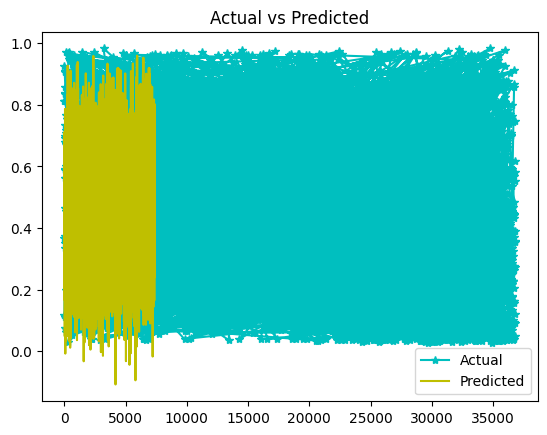

In [25]:
plt.plot(y_test, label = 'Actual', marker = '*', color = 'c')
plt.plot(y_pred, label = 'Predicted', color = 'y')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()